<a href="https://colab.research.google.com/github/maryom99/DICV_2023_M/blob/main/Week3_3I_Maryam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 
## Simple Image Operations – Linear Brightness,Contrast, Inverse, Logarithmic Brightness , and Grayscale Image

Name : Maryam Mohammed Ali Albaiti

NIM : 2041720205

No : 06

Class : 3I

## PRACTICUM

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
import matplotlib.pylab as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


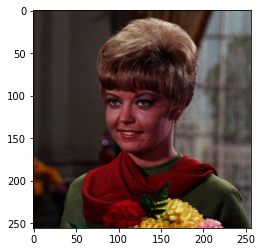

In [ ]:
original = cv.imread('/content/drive/MyDrive/images_DICV/female.tiff')
original1 = cv.cvtColor(original,cv.COLOR_BGR2RGB)  # convert to RGB
plt.imshow(original1)

Change the brightness level of the image
----------------------------------------
Enter brightness value: 50


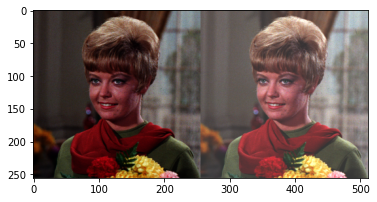

In [ ]:
# the formula for doing transformation
# linear brightness is as follows :
# 𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

print('Change the brightness level of the image')
print('----------------------------------------')
try:
    brightness = int(input('Enter brightness value: '))
except ValueError:
    print('Error, not a number')

brightness_image = np.zeros(original1.shape, original1.dtype)

#access per pixel
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    for c in range(original1.shape[2]):
      brightness_image[y,x,c] = np.clip(original1[y,x,c] + brightness, 0, 255)

#a simple way without a for loop
#brightness_image = cv.convertScaleAbs(original1, beta=brightness)

final_frame = cv.hconcat((original1, brightness_image))
plt.imshow(final_frame)

## TASK

### 1
Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:

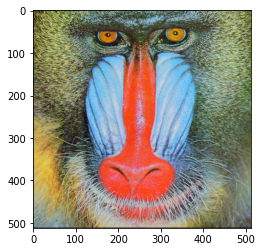

In [ ]:
image2 = cv.imread('/content/drive/MyDrive/images_DICV/mandrill.tiff')
original2 = cv.cvtColor(image2,cv.COLOR_BGR2RGB)  # convert to RGB
plt.imshow(original2)

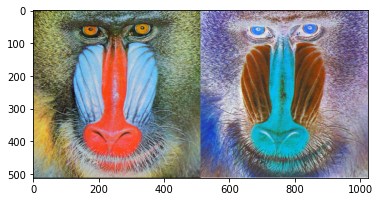

In [ ]:
# 𝑔(𝑥) = 255 − 𝑓(𝑥) , where g(x,y) is a negative image, and f(x,y) is the original image
# If the original pixel value is 255, with this operation the result will be 0 ( because 255 – 255).

invert_image = np.zeros(original2.shape, original2.dtype)

#access per pixel
for x in range(original2.shape[0]):
  for y in range(original2.shape[1]):
    for c in range(original2.shape[2]):
      invert_image[x,y,c] = np.clip(255 - original2[x,y,c], 0, 255)

final_frame = cv.hconcat((original2, invert_image ))
plt.imshow(final_frame)

### 2

Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

Change the contrast and brightness level of the image
----------------------------------------
Enter brightness value: 60
Enter contrast value: 1.5


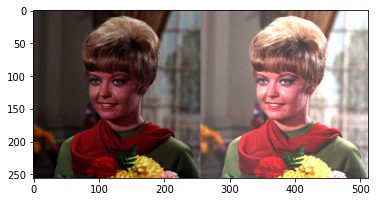

In [ ]:
# Contrast operations can be done by modifying the formula used for linear brightness, namely:
# 𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏

print('Change the contrast and brightness level of the image')
print('----------------------------------------')
try:
    brightness = int(input('Enter brightness value: '))
    a = float(input('Enter contrast value: '))
except ValueError:
    print('Error, not a number')

brightness_image = np.zeros(original1.shape, original1.dtype)

#access per pixel
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    for c in range(original1.shape[2]):
      brightness_image[y,x,c] = np.clip(a * original1[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original1, brightness_image))
plt.imshow(final_frame)

Using Factor

Enter contrast value [-255 - 255]: -200


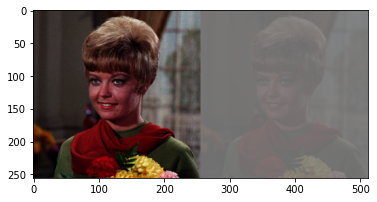

In [ ]:
transform_img = np.zeros(original1.shape, original1.dtype)
try:
  contrast = float(input('Enter contrast value [-255 - 255]: '))
except ValueError as e:
  print('Error', e)
factor = (259 * (contrast  + 255)) / (255 * (259 - contrast))

# Constrast Transformation 
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    for c in range(original1.shape[2]):
      transform_img[y, x, c] =  np.clip((factor * (original1[y, x, c] - 128) + 128) ,0, 255)

transform = cv.hconcat((original1,  transform_img))
plt.imshow(transform)

### 3

Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

Change the brightness level of the image with Log Transformation
----------------------------------------
Enter brightness value: 40


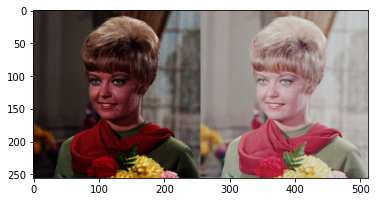

In [ ]:
#In general, the form of the log transformation is :
#𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)
# where
# c : constant
# r : Input Image gray-level value
# s : Output Image gray-level value

print('Change the brightness level of the image with Log Transformation')
print('----------------------------------------')
try:
    brightness = int(input('Enter brightness value: '))
except ValueError:
    print('Error, not a number')

brightness_image = np.zeros(original1.shape, original1.dtype)

for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    for c in range(original1.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * np.log(1 + original1[y,x,c]), 0, 255)

final_frame = cv.hconcat((original1, brightness_image))
plt.imshow(final_frame)

### 4

Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝑎𝑣𝑔 =
(𝑅 + 𝐺 + 𝐵)/3

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠 =
max[𝑅, 𝐺, 𝐵] + min[𝑅, 𝐺, 𝐵]/2

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07𝐵

#### a. Averaging

np.mean avg

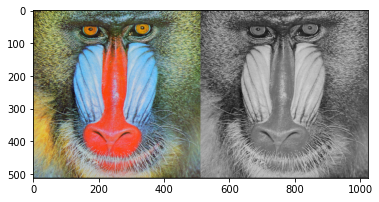

In [ ]:
avg_image = np.zeros(original2.shape, original2.dtype)

for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):

      avg_image[y,x,c] = np.mean(original2[y,x, : ])
      
final_frame = cv.hconcat((original2, avg_image))
plt.imshow(final_frame)

#### b. Lightness

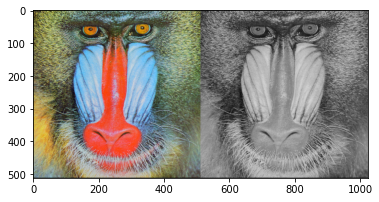

In [ ]:
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠 = max[𝑅, 𝐺, 𝐵] + min[𝑅, 𝐺, 𝐵]/2
lightness_image = np.zeros(original2.shape, original2.dtype)

for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):

      lightness_image[y,x,c] = np.max(original2[y,x, : ])/2 + np.min(original2[y,x, : ])/2
      
final_frame = cv.hconcat((original2, lightness_image))
plt.imshow(final_frame)

#### c. Luminance

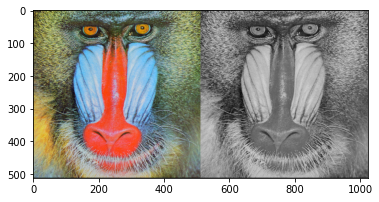

In [ ]:
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07𝐵
luminance_image = np.zeros(original2.shape, original2.dtype)

for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):

      luminance_image[y,x,c] = 0.21*original2[y,x,0] + 0.72*original2[y,x,1] + 0.07*original2[y,x,2]
      
final_frame = cv.hconcat((original2, luminance_image))
plt.imshow(final_frame)

### 5

Show certain colors in the image , and change other colors to grayscale. For example, show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :

In [4]:
image = cv.imread('/content/drive/MyDrive/images_DICV/mandrill.tiff')

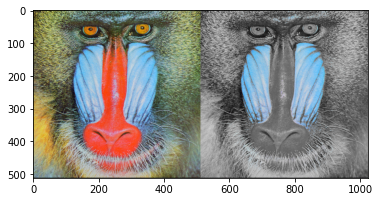

In [9]:
# Convert color space to RGB
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_gray = np.copy(img_rgb)

for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
      
          r = img_rgb[y, x,0]
          g = img_rgb[y, x,1]
          b = img_rgb[y, x,2]

          if r > 10 and g > 10 and b < 200:
            gray_value = 0.21 * r + 0.72 * g + 0.07 * b    # 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07𝐵
            img_gray[y, x] = [gray_value, gray_value,gray_value]

# Concatenate the input and output images 
combined = cv.hconcat((img_rgb, img_gray))

plt.imshow(combined)

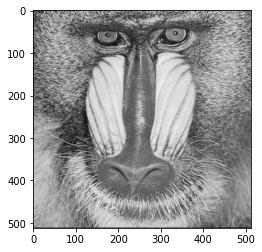

In [13]:
# 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07𝐵

# Extract the blue channel
blue_img = np.zeros_like(image)
blue_img[:,:,2] = image[:,:,2]

# Convert the blue channel to grayscale
blue_img = np.dot(blue_img[...,:3], [0.21, 0.72, 0.07])

# Convert the image to grayscale
gray_img = np.dot(image[...,:3], [0.21, 0.72, 0.07])

# Add the blue channel to the grayscale image
result_img = gray_img + blue_img

# Display the resulting image
plt.imshow(result_img, cmap='gray')
plt.show()